### Project Overview
- Your goal is to evaluate every stock in the s&P500, and Nasdaq Adj Close as well as the daily return
- You will look for companies who too a dip (Loss for the day) as  well as companies that have spiked for the today's close

## Project approach:
- Use pandas data reader to get all Adj Close data for each stock for the year 2020 
- Will import all securities form a past project that passed properly through pandas data reader 
- Add all of resuts to a data frame
- Calculate the Daily return for each stock as well as the volitility year to date
- group Dips and Spikes - Which are worthy of investing

In [1]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = pd.read_csv("resources/passed_Tickers.csv", index_col='Unnamed: 0')

In [3]:
tickers = list(tickers["Tickers"].values)

## Fetching the data 
 - we need ot consider companies that myay no longer exist and or have failed 
 - We also need to store the failed companies for future use

In [4]:
data = pd.DataFrame()

In [5]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

## Taking A Look at Arconic and the companies Coorelated Year to Date

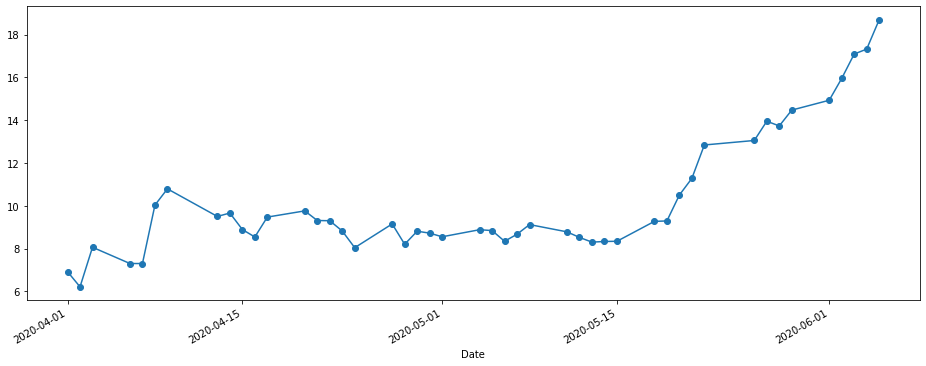

In [6]:
data["ARNC"].plot(figsize = (16,6), marker = "o")

### Passed Companies Passed 
- 471 companies passed the yahoo finance 

In [7]:
len(passed)

471

## Corr to Arconic
- Below are the top 20 companies coorelated to arconic 

In [8]:
data.corrwith(data["ARNC"]).sort_values(ascending = False).head(20)

ARNC    1.000000
RTN     1.000000
ALB     0.951005
PPG     0.941833
MTD     0.936192
TDG     0.933676
GRMN    0.930184
F       0.927472
ETFC    0.926549
MS      0.925670
NKE     0.920935
GD      0.920888
GM      0.918445
LB      0.916974
EL      0.915942
XRAY    0.915343
VTR     0.914605
ALK     0.912026
DISH    0.911504
CHRW    0.908565
dtype: float64

## Daily Returns for each Stock
- We will focus on todays closing only to see which companies Dip or spikes

In [9]:
returns_df = pd.DataFrame()
for x in passed:
    data[f"{x} daily return"] = data[f"{x}"].pct_change()
    returns_df[f"{x}"] = data[f"{x}"].pct_change()

## Analysis of todays close - Spikes
- top 20 companies that had the highest daily returns at close

In [28]:
returns_df.transpose()["2020-06-05"].sort_values(ascending = False).head(20)

OXY     0.336978
APA     0.236154
RCL     0.203675
MAC     0.192308
MRO     0.174960
CCL     0.163961
TRIP    0.158110
SPG     0.154698
DVN     0.147799
NCLH    0.144972
F       0.117199
KSS     0.114933
BA      0.114650
OKE     0.113977
FTI     0.113821
AAL     0.111842
XEC     0.110920
NBL     0.110454
ALGN    0.108202
ADS     0.106547
Name: 2020-06-05 00:00:00, dtype: float64

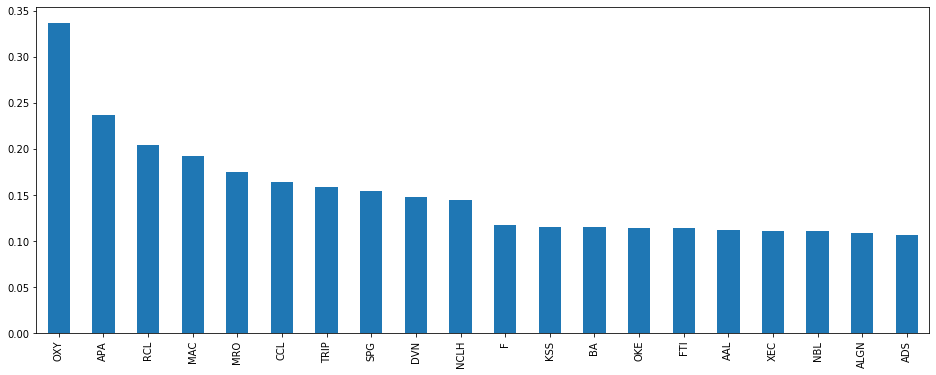

In [29]:
returns_df.transpose()["2020-06-05"].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (16,6))

### Dips 
- top 20 companies that had the lowest daily returns fot todays close

In [30]:
returns_df.transpose()["2020-06-05"].sort_values(ascending = True).head(20)

NKTR   -0.035931
CLX    -0.032705
CBOE   -0.031575
AKAM   -0.027887
VRTX   -0.026134
NEM    -0.020394
DGX    -0.020330
BLL    -0.019496
KR     -0.019028
CHTR   -0.017240
SJM    -0.015215
CPB    -0.012098
ILMN   -0.011970
SBAC   -0.011344
EBAY   -0.010940
IQV    -0.010780
FLIR   -0.010654
GILD   -0.010188
LLY    -0.009953
A      -0.008339
Name: 2020-06-05 00:00:00, dtype: float64

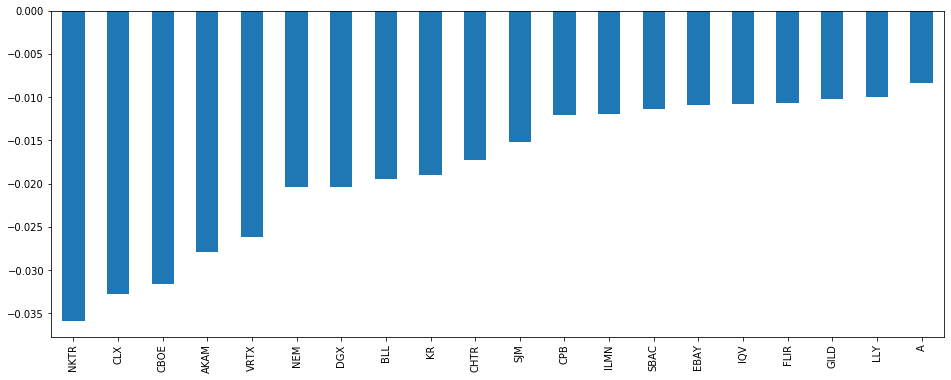

In [31]:
returns_df.transpose()["2020-06-05"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

# Nasdaq - Dips and Spikes

- Fetching Data
- we will repeat the same process for the Nasdaq

In [14]:
nasdaq = pd.DataFrame()

In [15]:
nasdaq_data = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [16]:
nas_tickers = list(nasdaq_data["Ticker"].values)

In [17]:
nas_failed = []
nas_passed = []
for x in nas_tickers:
    try:
        nasdaq[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        nas_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        nas_failed.append(x)

## Daily Returns for Nasdaq

In [18]:
nas_returns = pd.DataFrame()
for x in nas_passed:
    nasdaq[f"{x} returns"] = nasdaq[f"{x}"].pct_change()
    nas_returns[f"{x}"] = nasdaq[f"{x}"].pct_change()

### Spikes
 - Top 20 companies with the higheest daily returns

In [32]:
nas_returns.transpose()["2020-06-05"].sort_values(ascending = False).head(20)

AAL     0.111842
ALGN    0.108202
UAL     0.084655
PAYX    0.078986
ADP     0.067747
WYNN    0.065318
CTAS    0.064225
NTAP    0.061865
SWKS    0.058211
WDC     0.053936
ISRG    0.050527
NTES    0.050270
HAS     0.049312
BIDU    0.048964
MU      0.048809
LRCX    0.044819
JD      0.044586
SBUX    0.043180
HSIC    0.040297
BKNG    0.040169
Name: 2020-06-05 00:00:00, dtype: float64

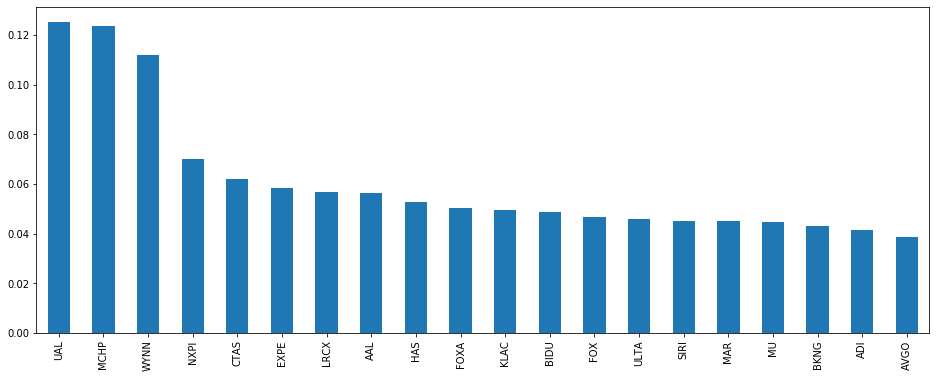

In [20]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

## Dips
- top 20 companies with the lowest daily returns for today

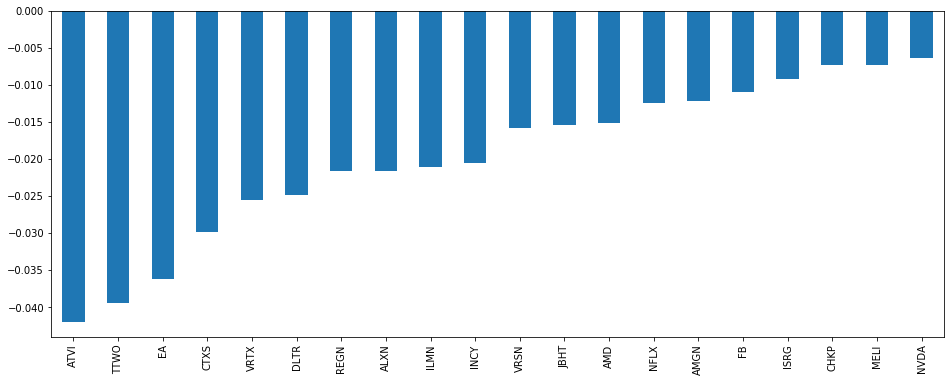

In [21]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

In [22]:
nas_returns.transpose()["2020-06-03"].sort_values(ascending = True).head(20)

ATVI   -0.041929
TTWO   -0.039376
EA     -0.036205
CTXS   -0.029888
VRTX   -0.025539
DLTR   -0.024851
REGN   -0.021662
ALXN   -0.021586
ILMN   -0.021117
INCY   -0.020515
VRSN   -0.015778
JBHT   -0.015453
AMD    -0.015129
NFLX   -0.012497
AMGN   -0.012158
FB     -0.011000
ISRG   -0.009227
CHKP   -0.007309
MELI   -0.007269
NVDA   -0.006317
Name: 2020-06-03 00:00:00, dtype: float64

### S&P Vol 2020

In [23]:
cols = [x for x in returns_df]

In [24]:
sandp_vol = []
for x in returns_df.columns:
    sandp_vol.append(returns_df[f"{x}"].std())

In [25]:
s_andp_volitility = pd.DataFrame(sandp_vol, index=cols, columns=["vol"])

In [34]:
s_andp_volitility.drop("EW")

,vol
MMM,0.031558
AOS,0.030052
ABT,0.032819
ABBV,0.028671
ACN,0.034979
...,...
XYL,0.039300
YUM,0.039809
ZBH,0.040826
ZION,0.039993


### Top 10 most volitile companies - S&P 2020 - year to date

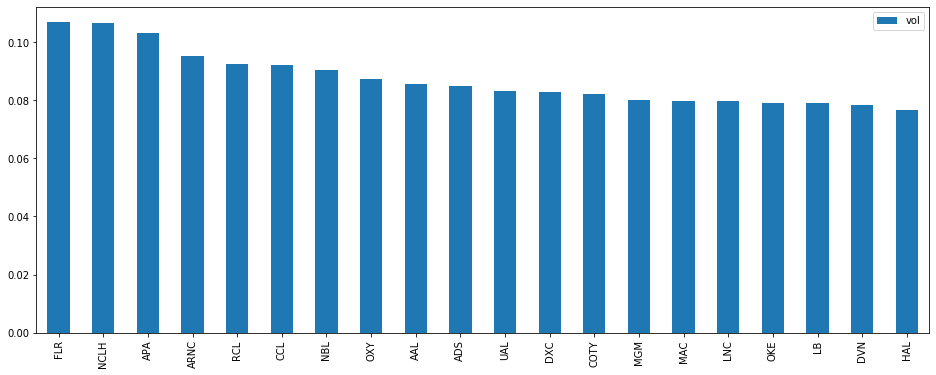

In [35]:
s_andp_volitility.drop("EW").sort_values("vol", ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

### Top 10 least volitile companies - S&P 2020 - year to date

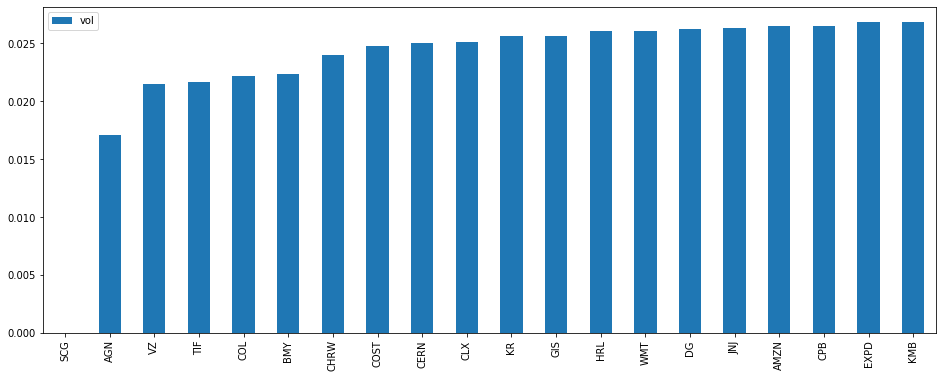

In [27]:
s_andp_volitility.sort_values("vol", ascending = True).head(20).plot(kind = "bar", figsize = (16,6))